In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, mean_squared_error, r2_score

In [225]:
filename = 'test_task_data.csv'

df = pd.read_csv(filename, parse_dates=['date'],
                 infer_datetime_format=True,
                 index_col='date',
                 thousands=',',
                 decimal='.')
df.head()

<ipython-input-225-d8acb46f1dc7>:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(filename, parse_dates=['date'],


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,target_value,target_class
date,,,,,,,,,,,,,,,,,,
2012-01-02,1997.00,107.38,647.12,2.989,NaN,100.01969,99.99426,780.009937,2046.54,2206.40,100.018520,100.01513,100.02063,99.99438,100.05073,100.00010,59.324325,0
2012-01-03,2054.50,112.13,659.88,2.993,NaN,100.02017,99.99412,759.164751,1988.59,2142.35,100.021520,100.01485,100.02053,99.99495,100.06121,100.00026,60.971989,0
2012-01-04,2041.25,113.70,659.12,3.096,NaN,100.01999,99.99390,732.813473,1914.14,2061.66,100.023157,100.01392,100.02005,99.99546,100.06965,100.00031,61.100708,0
2012-01-05,2013.00,112.74,642.38,2.980,NaN,100.01942,99.99319,713.076630,1858.52,2001.38,100.024237,100.01168,100.01942,99.99580,100.07656,100.00034,60.808938,0
2012-01-06,2045.75,113.06,644.38,3.062,NaN,100.01914,99.99261,694.993964,1807.86,1946.24,100.025873,100.01071,100.01931,99.99592,100.08451,100.00039,60.448514,0


# **CHECK DATA AND RESOLVE PROBLEMS**

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1687 entries, 2012-01-02 to 2018-06-19
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   feature_1     1687 non-null   float64
 1   feature_2     1687 non-null   float64
 2   feature_3     1687 non-null   float64
 3   feature_4     1687 non-null   float64
 4   feature_5     1479 non-null   float64
 5   feature_6     1687 non-null   float64
 6   feature_7     1687 non-null   float64
 7   feature_8     1687 non-null   float64
 8   feature_9     1687 non-null   float64
 9   feature_10    1687 non-null   float64
 10  feature_11    1687 non-null   float64
 11  feature_12    1687 non-null   float64
 12  feature_13    1687 non-null   float64
 13  feature_14    1687 non-null   float64
 14  feature_15    1687 non-null   float64
 15  feature_16    1687 non-null   float64
 16  target_value  1687 non-null   float64
 17  target_class  1687 non-null   int64  
dtypes: float64

In [227]:
# Check missing values
df.isnull().sum()

,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,208
feature_6,0
feature_7,0
feature_8,0
feature_9,0
feature_10,0


In [228]:
# Resolving the missing values
df['feature_5'] = df['feature_5'].fillna(df['feature_5'].median())

In [229]:
# Check missing values again
df.isnull().sum()

,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0
feature_9,0
feature_10,0


# **DATA VISUALIZATION**

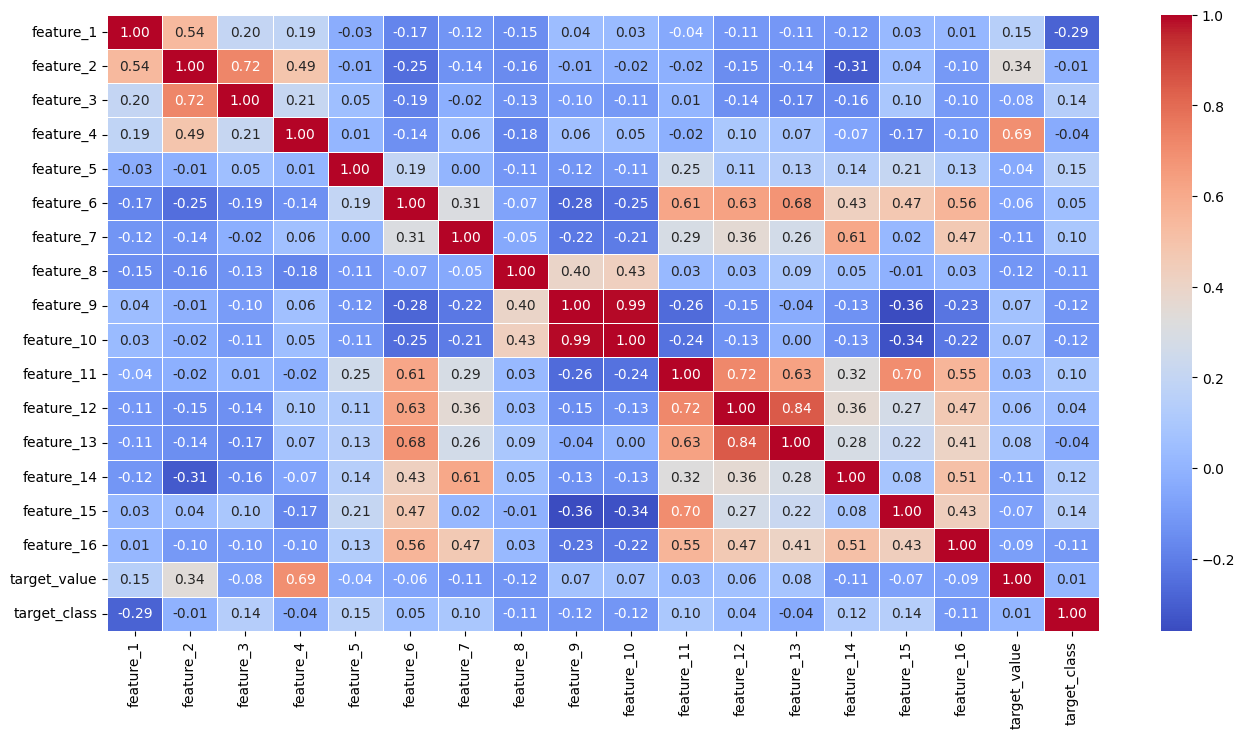

In [232]:
# Let's also draw a heatmap visualization of the correlation matrix
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# **DATA PREPROCESSING AND PREPARATION**

In [251]:
# Separate features and target
X = df.drop(columns=['target_value', 'target_class'])
y = df['target_class']

In [252]:
from sklearn.preprocessing import MinMaxScaler

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled
X_scaled.shape

(1687, 16)

In [253]:
# Create sequences
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y.values, 60)
print(X_seq.shape)
print(y_seq.shape)

# 60 means 60 timesteps back
# 16 means 16 features
# 1293 is the expected output or true output

(1627, 60, 16)
(1627,)


In [254]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target
y_seq = to_categorical(y_seq)
y_seq

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# **TRAIN TEST SPLITTING**

In [255]:
# Split the data into train and test sets based on chronological order
train_size = int(0.8 * len(X_seq))  # Use 80% of the data for training
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1301, 60, 16)
(1301, 2)
(326, 60, 16)
(326, 2)


# **BUILD LSTM MODEL**

In [280]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.regularizers import l2

In [270]:
LAMBD = 5e-2
# Model Building
model = Sequential()

model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD)))
model.add(BatchNormalization())
model.add(Dropout(0.1)),

model.add(LSTM(32, return_sequences=False, kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD)))
model.add(BatchNormalization())
model.add(Dropout(0.1)),

model.add(Dense(y_train.shape[1], activation='softmax'))  # Number of classes

In [271]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [272]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.6540 - loss: 10.8818 - val_accuracy: 0.8473 - val_loss: 7.6623
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.8898 - loss: 6.5691 - val_accuracy: 0.8473 - val_loss: 4.8703
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9149 - loss: 4.0330 - val_accuracy: 0.8473 - val_loss: 3.2207
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9262 - loss: 2.5669 - val_accuracy: 0.8473 - val_loss: 2.2835
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.9380 - loss: 1.7366 - val_accuracy: 0.6718 - val_loss: 1.8659
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9244 - loss: 1.2782 - val_accuracy: 0.8473 - val_loss: 1.4011
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.9331 - loss: 0.9883 - val_accuracy: 0.6412 - val_loss: 1.2709
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9355 - loss: 0.8345 - val_accuracy: 0.603

In [273]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_66 (LSTM)                       │ (None, 60, 32)              │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 60, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_67 (LSTM)                       │ (None, 60, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 60, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_68 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,704 (272.29 KB)

 Trainable params: 23,170 (90.51 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 46,342 (181.03 KB)

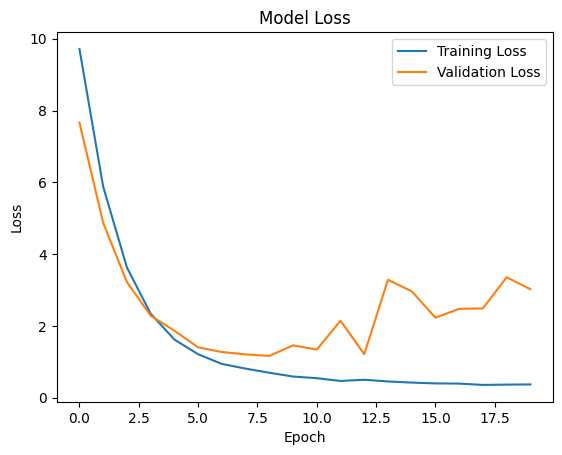

In [274]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()  # Add a legend to differentiate between training and validation loss
plt.show()

In [275]:
# Predict on the test set
y_pred_prob = model.predict(X_test)  # Probabilities for each class
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted class labels
y_test_actual = np.argmax(y_test, axis=1)  # Actual class labels (one-hot to integer)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


In [276]:
y_test_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [277]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

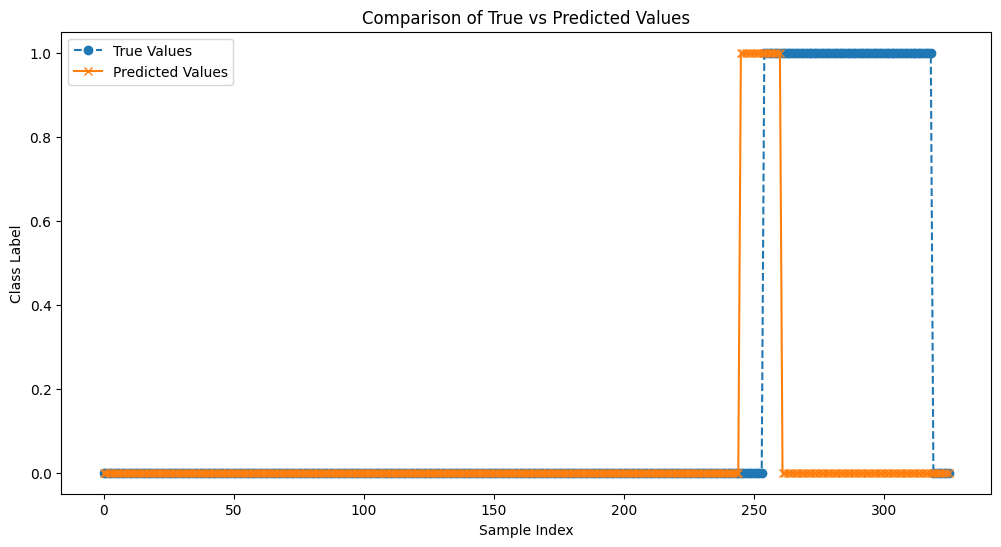

In [278]:
import matplotlib.pyplot as plt
import numpy as np

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="True Values", linestyle="--", marker='o')
plt.plot(y_pred, label="Predicted Values", linestyle="-", marker='x')
plt.title("Comparison of True vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()

In [279]:
from sklearn.metrics import classification_report, accuracy_score
# Calculate and print accuracy
accuracy = accuracy_score(y_test_actual, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7945
